# [Lab Session 3](fourier.ipynb)


In [177]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize

**[Task 1 (a).]()** Load the first image, resize it to (256, 256) and display it.


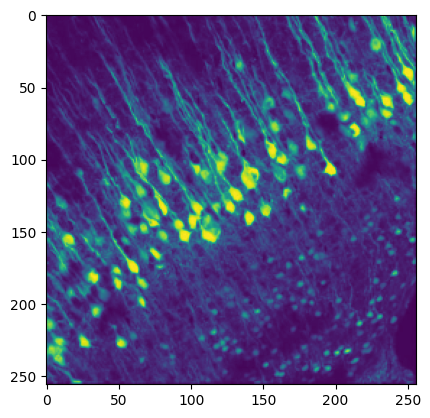

In [178]:
image4 = plt.imread('data/cells.png')
image4 = resize(image4, (256, 256) )
plt.imshow(image4);

**[Task 1 (b).]()** Apply the fast Fourier transform and check the data type of the result.


In [179]:
#code schon gegeben, erklärung siehe assignment

cell_ft = np.fft.fft2(image4)

**[Task 1 (c).]()** Extract the phase and amplitude and display them.


In [180]:
#code schon gegeben, erklärung siehe assignment

amplitude_cell = np.abs(cell_ft)
phase_cell = np.angle(cell_ft)

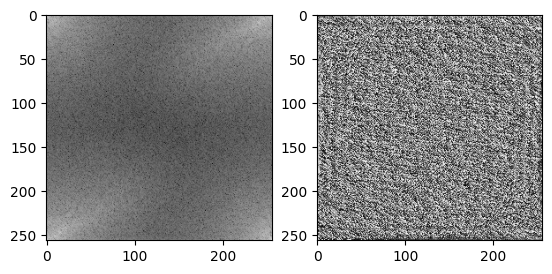

In [ ]:
#code schon gegeben, erklärung siehe assignment

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude_cell), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase_cell, 'gray');



**[Task 1 (d).]()** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.


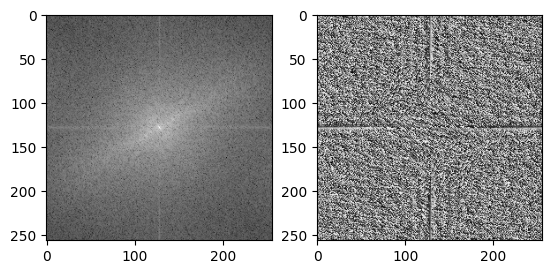

In [182]:
# shift:
cell_ft1 = np.fft.fftshift(cell_ft)

amplitude_cell_shift = np.abs(cell_ft1)
phase_cell_shift = np.angle(cell_ft1)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude_cell_shift), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase_cell_shift, 'gray');

**[Task 1 (e).]()** Apply the inverse FFT and display the restored image.


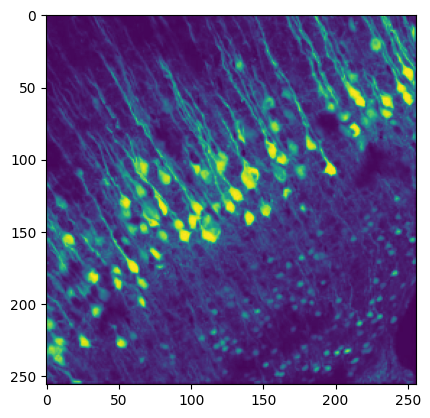

In [183]:
#image vom anfang restoren --> wieder mit cell_ft arbeiten also dem image vor dem shift
cell_real = np.fft.ifft2(cell_ft)

#v since the original image contains only real numbers, the restored image can be accessed using the real values of the array --> .real
plt.imshow(cell_real.real);



---


**[Task 2 (a).]()** Load the brain CT image.


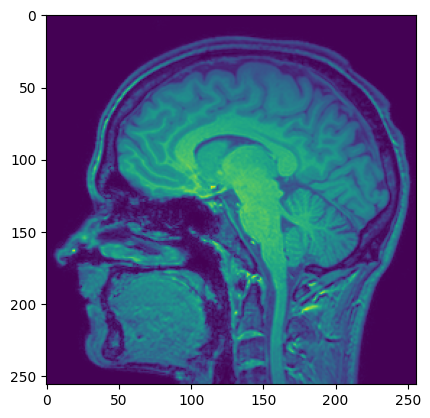

In [184]:
image5 = plt.imread('data/brain_ct.png')
plt.imshow(image5);

**[Task 2 (b).]()** Apply the FFT, do a shift, extract amplitude and phase.


In [ ]:
#FFT:
brain_ft = np.fft.fft2(image5)

#shift:
brain_ft = np.fft.fftshift(brain_ft)

#amplitude & phase
amplitude_brain_shift = np.abs(brain_ft)
phase_brain_shift = np.angle(brain_ft)

In [186]:
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)

**[Task 2 (c).]()** Merge the amplitude of the brain CT and the phase of cell image. Do the IFFT and display the resulting image.


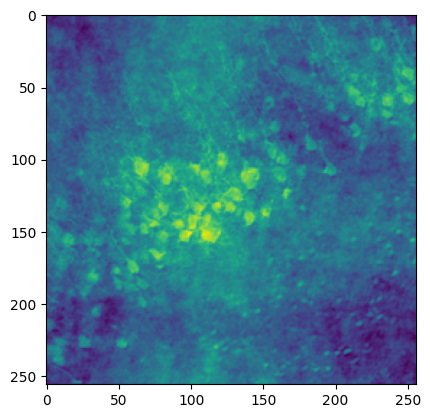

In [187]:
# gaol: merged image 
# --> restoring it from amplitude of brain & phase of cell

# 1. convert amp. & pha. to Cartesian complex array by "to_complex_array" + show result
merged1= to_complex_array(amplitude_brain_shift, phase_cell_shift)

#reverse shift
merged1_rs= np.fft.ifftshift(merged1)

#reverse transformation
merged1_rs_rt = np.fft.ifft2(merged1_rs)

#show nur realen teil
plt.imshow(merged1_rs_rt.real);

**[Task 2 (d).]()** Repeat this with the amplitude of the cells and the phase of the brain.


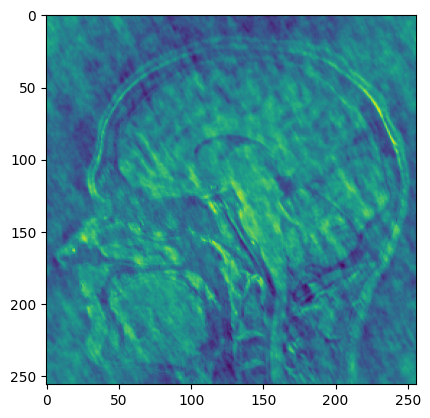

In [188]:
# gaol: merged image 
# --> restoring it from amplitude of cell & phase of brain

# 1. convert amp. & pha. to Cartesian complex array by "to_complex_array" + show result
merged2 = to_complex_array(amplitude_cell_shift, phase_brain_shift)

#reverse shift
merged2_rs= np.fft.ifftshift(merged2)

#reverse transformation
merged2_rs_rt = np.fft.ifft2(merged2_rs)

#show nur realen teil
plt.imshow(merged2_rs_rt.real);

---


**[Task 3 (a).]()** Create a lowpass filter mask.


In [240]:
filter_window_size = 50

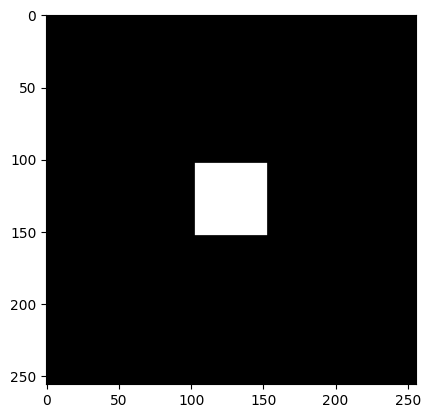

In [ ]:
#goal: low pass filter mask
# --> mask same size as image, filled with zeros, except middle: filled with 1

# Define the image size
image_size = (256, 256)

# Create an array filled with zeros
low_pass_mask = np.zeros(image_size)

# Define the filter window size
filter_width, filter_height = filter_window_size, filter_window_size

# Calculate the center of the mask
center_x, center_y = image_size[0] // 2, image_size[1] // 2

# Insert the rectangular filter at the center of the mask
low_pass_mask[
    center_x - filter_width // 2:center_x + filter_width // 2,
    center_y - filter_height // 2:center_y + filter_height // 2
] = 1

# Visualize the mask
plt.imshow(low_pass_mask, cmap='gray')
plt.show()

"""
low pass filter: 
niedrige werte werden erhalten???
"""

**[Task 3 (b).]()** Create a highpass filter maks.


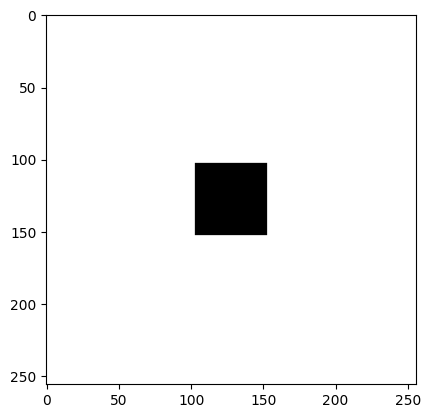

In [242]:
# Create the high-pass filter mask by inverting the low-pass mask
high_pass_mask = 1 - low_pass_mask

# Visualize the high-pass mask
plt.imshow(high_pass_mask, cmap='gray')
plt.show()

**[Task 3 (c).]()** Apply the lowpass and highpass filter mask to the amplitude of the brain and display the results.


/tmp/ipykernel_1001/3252097374.py:7: RuntimeWarning: divide by zero encountered in log
  log_low_pass_brain = np.log(low_pass_amplitude_brain)  # Log scale for the low-pass
/tmp/ipykernel_1001/3252097374.py:8: RuntimeWarning: divide by zero encountered in log
  log_high_pass_brain = np.log(high_pass_amplitude_brain)  # Log scale for the high-pass


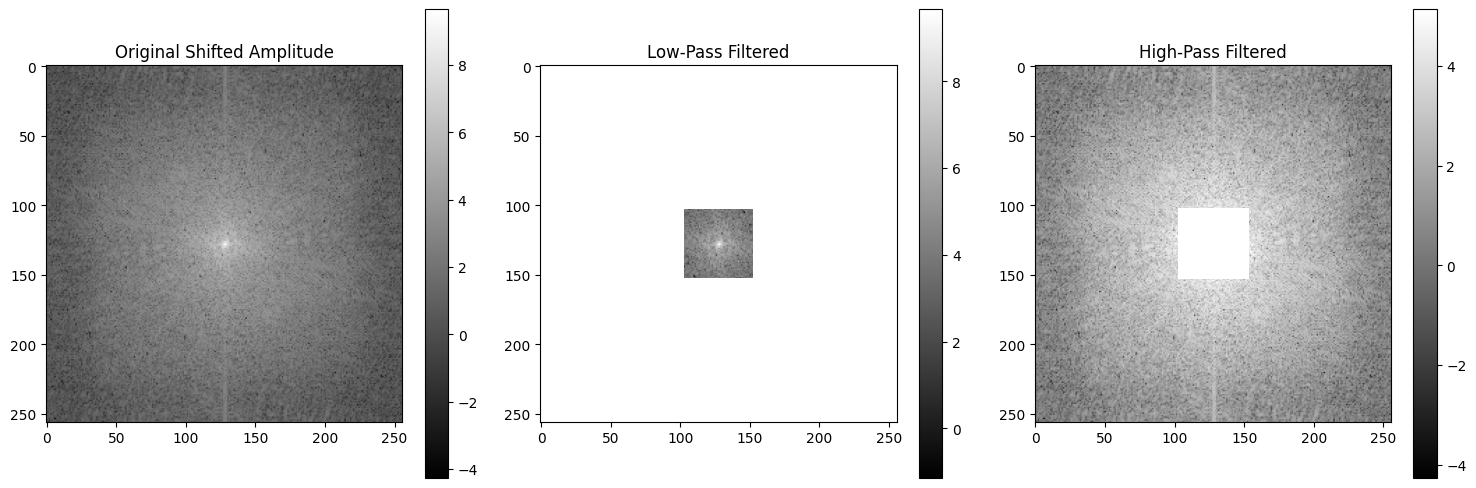

In [ ]:
# Apply the low-pass and high-pass masks
low_pass_amplitude_brain = amplitude_brain_shift * low_pass_mask
high_pass_amplitude_brain = amplitude_brain_shift * high_pass_mask

# Logarithmic scaling for better visualization
log_amplitude_brain = np.log(amplitude_brain_shift)  # Log scale for the unfiltered
log_low_pass_brain = np.log(low_pass_amplitude_brain)  # Log scale for the low-pass
log_high_pass_brain = np.log(high_pass_amplitude_brain)  # Log scale for the high-pass

# Visualize the results
plt.figure(figsize=(15, 5))

# Unfiltered
plt.subplot(1, 3, 1)
plt.imshow(log_amplitude_brain, cmap='gray')
plt.title('Original Shifted Amplitude')
plt.colorbar()

# Low-pass filtered
plt.subplot(1, 3, 2)
plt.imshow(log_low_pass_brain, cmap='gray')
plt.title('Low-Pass Filtered')
plt.colorbar()

# High-pass filtered
plt.subplot(1, 3, 3)
plt.imshow(log_high_pass_brain, cmap='gray')
plt.title('High-Pass Filtered')
plt.colorbar()

plt.tight_layout()
plt.show()


# abgebildet:fourir transformation: bildet frequenzen ab


**[Task 3 (d).]()** Apply the mask to the amplitude, merge the result with the phase and restore the image.


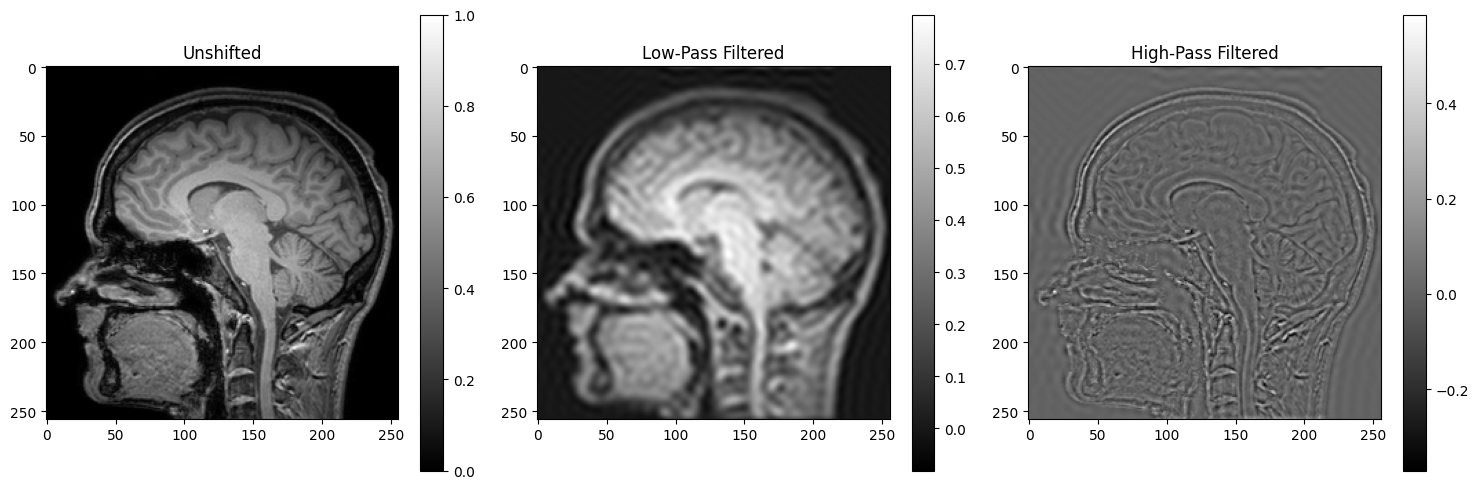

In [244]:
#alles immer 3x --> unfilterd, low pass und high pass
#unterschied shifted, filtered

#merging of log_low_pass_brain / high pass/ unfiltered mit phase_brain_shift
merged3_un = to_complex_array(amplitude_brain_shift, phase_brain_shift)
merged3_low = to_complex_array(low_pass_amplitude_brain, phase_brain_shift)
merged3_high = to_complex_array(high_pass_amplitude_brain, phase_brain_shift)

#reverse shift
merged3_un_rs= np.fft.ifftshift(merged3_un)
merged3_low_rs= np.fft.ifftshift(merged3_low)
merged3_high_rs= np.fft.ifftshift(merged3_high)

# reverse transformation 
merged3_un_rs_rt = np.fft.ifft2(merged3_un_rs)
merged3_low_rs_rt = np.fft.ifft2(merged3_low_rs)
merged3_high_rs_rt = np.fft.ifft2(merged3_high_rs)



#plot mit .real

# Visualize the results
plt.figure(figsize=(15, 5))

# Unfiltered
plt.subplot(1, 3, 1)
plt.imshow(merged3_un_rs_rt.real, cmap='gray')
plt.title('Unshifted')
plt.colorbar()

# Low-pass filtered
plt.subplot(1, 3, 2)
plt.imshow(merged3_low_rs_rt.real, cmap='gray')
plt.title('Low-Pass Filtered')
plt.colorbar()

# High-pass filtered
plt.subplot(1, 3, 3)
plt.imshow(merged3_high_rs_rt.real, cmap='gray')
plt.title('High-Pass Filtered')
plt.colorbar()

plt.tight_layout()
plt.show()


**[Task 3 (e).]()** Repeat the above steps using different filter sizes and observe the differences.

low pass filter 
--> tiefe freq. grundstrukturen
--> texture ausblurren, ohne farben verändern

high pass filter
--> kantenerkennung

*[Filter size = 1]()*
low pass filter is homogenous grey
high pass filter is sharp

*[Filter size = 255]()*
low pass filter is sharp
high pass filter is homogenous grey

---


**[Task 4 (a).]()** Implement a function that computes the 2D-DFT.


In [ ]:
dft = np.zeros(image4.shape, dtype=complex)
M, N = image4.shape


def dft_manual(img):
    # Compute DFT using the formula
    for u in range(M):
        for v in range(N):
            # Initialize the summation
            sum_val = 0.0
            for x in range(M):
                for y in range(N):
                    # Exponential factor
                    exponent = -2j * np.pi * ((u * x / M) + (v * y / N))
                    sum_val += img[x, y] * np.exp(exponent)
            # Store normalized value
            dft[u, v] = sum_val / (M * N)

    return dft


#x, y pixel
# u,v frequenzen


**[Task 4 (b).]()** Implement a function that computes the 2D-IDFT.


In [246]:
def idft_manual(dft):
    # Compute DFT using the formula
    for u in range(M):
        for v in range(N):
            # Initialize the summation
            sum_val = 0.0
            for x in range(M):
                for y in range(N):
                    # Exponential factor
                    exponent = 2j * np.pi * ((u * x / M) + (v * y / N))
                    sum_val += dft[x, y] * np.exp(exponent)
            # Store normalized value

    return idft

Due to high computational costs, we need to resize the image.


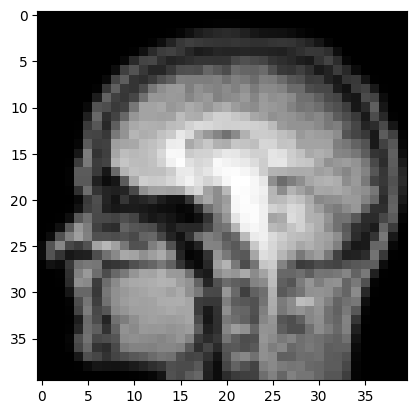

In [247]:
test_img = resize(image5, (40, 40))
plt.imshow(test_img, 'gray')

**[Task 4 (c).]()** Apply your DFT implementation to the image and display amplitude and phase.


In [248]:
brain_dft = dft_manual(image5)

#shift:
brain_dft = np.fft.fftshift(brain_dft)

#amplitude & phase
amplitude_brain_shift_dft = np.abs(brain_dft)
phase_brain_shift_dft = np.angle(brain_dft)

KeyboardInterrupt: 

**[Task 4 (d).]()** Reconstruct the image using your IDFT implementation and display it.


**[Task 4 (e).]()** Compare your result to the result of numpy's FFT


**[Task 4 (f).]()** Round the arrays and compare them again.


**[Task 4 (g).]()** Compare the run times of the two algorithms (your DFT and numpy's FFT)
